In [1]:
from SciServer import SkyServer
from SciServer import CasJobs
print('Imported SciServer modules')

Imported SciServer modules


In [2]:
#import pandas
#import numpy as np
#from pprint import pprint
#from datetime import datetime, timedelta
from matplotlib import pyplot as plt
#from pprint import pprint
#from IPython.display import display, HTML
print('Imported other needed modules')

Imported other needed modules


In [ ]:
# Read the help document for the SkyServer module
help(SkyServer)

In [3]:
# Exectute an SQL query, get results as a pandas dataframe

SkyServer_TestQuery = "select top 1 specobjid, ra, dec from specobj order by specobjid"
SkyServer_DataRelease = "DR14"

df = SkyServer.sqlSearch(sql=SkyServer_TestQuery, dataRelease=SkyServer_DataRelease)
#df = df.set_index('specobjid')
print(df)

# Queries in SkyServer are limited: they must run in 90 seconds or less and return 500,000 rows or less.
# Results of SkyServer queries are only available as a pandas dataframe
# If you need to run longer queries and/or other result formats, see the SciServer.CasJobs module (uncomment below for docs)
#help(CasJobs)

            specobjid         ra       dec
0  299489677444933632  146.71421 -1.041304


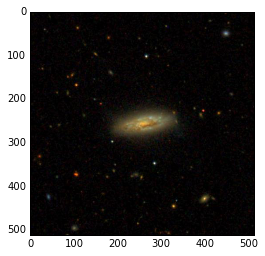

In [5]:
#get an image cutout with specified parameters - simple example
ra_center = 197.614455642896
dec_center = 18.438168853724
pixel_scale = 0.4

img = SkyServer.getJpegImgCutout(ra = ra_center, dec = dec_center, scale = pixel_scale) 

#img = SkyServer.getJpegImgCutout(ra=197.614455642896, dec=18.438168853724, width=2, height=2, scale=0.4, 
#                                 dataRelease=SkyServer_DataRelease,opt="OG",
#                                 query="SELECT TOP 100 p.objID, p.ra, p.dec, p.r FROM fGetObjFromRectEq(197.6,18.4,197.7,18.5) n, PhotoPrimary p WHERE n.objID=p.objID")

plt.imshow(img)
#myfig.show

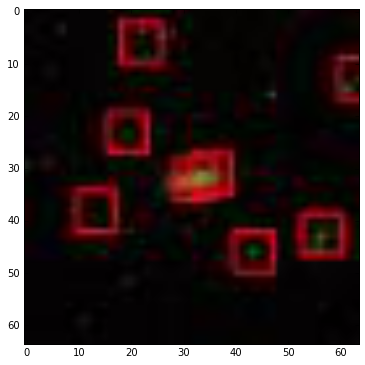

In [6]:
#get an image cutout with specified parameters - example with more options
ra_center = 197.614455642896
dec_center = 18.438168853724
imgwidth = 6
imgheight = 6
pixel_scale = 5
option_list = 'S'
my_query = ''
#my_query = 'SELECT TOP 100 p.objID, p.ra, p.dec, p.r FROM fGetObjFromRectEq(197.6,18.4,197.7,18.5) n, PhotoPrimary p WHERE n.objID=p.objID'


img = SkyServer.getJpegImgCutout(ra = ra_center, dec = dec_center, width = imgwidth, height = imgheight, scale = pixel_scale, 
                                dataRelease = SkyServer_DataRelease, opt = option_list, query = my_query)

#img = SkyServer.getJpegImgCutout(ra=197.614455642896, dec=18.438168853724, width=2, height=2, scale=0.4, 
#                                 dataRelease=SkyServer_DataRelease,opt="OG",
#                                 query="SELECT TOP 100 p.objID, p.ra, p.dec, p.r FROM fGetObjFromRectEq(197.6,18.4,197.7,18.5) n, PhotoPrimary p WHERE n.objID=p.objID")


plt.figure(figsize=(imgwidth,imgheight))
plt.imshow(img)
#myfig.show

In [7]:
# do a radial search of objects:

df = SkyServer.radialSearch(ra=258.25, dec=64.05, radius=0.1, dataRelease=SkyServer_DataRelease)
df

,objid,run,rerun,camcol,field,obj,type,ra,dec,u,g,r,i,z,Err_u,Err_g,Err_r,Err_i,Err_z
0,1237671939804561654,6162,301,3,133,246,3,258.250804,64.051445,23.33982,22.3194,21.41105,21.11971,20.84277,0.664019,0.116986,0.07641,0.080523,0.238198


In [8]:
#do rectangular search of objects:

df = SkyServer.rectangularSearch(min_ra=258.3, max_ra=258.31, min_dec=64,max_dec=64.01, dataRelease=SkyServer_DataRelease)
df

,objid,run,rerun,camcol,field,obj,type,ra,dec,u,g,r,i,z,Err_u,Err_g,Err_r,Err_i,Err_z
0,1237671939804628290,6162,301,3,134,1346,6,258.304721,64.006203,25.0008,24.50057,22.4854,21.10345,20.14999,0.995208,0.565456,0.166184,0.071836,0.124986


In [9]:
#do an object search based on RA,Dec coordinates:

object = SkyServer.objectSearch(ra=258.25, dec=64.05, dataRelease=SkyServer_DataRelease)
print(object)

[{'TableName': 'objectInfo', 'Rows': [{'specObjId': '', 'id': 1237671939804561654, 'specId': None, 'objId': '1237671939804561654', 'name': '', 'apid': ''}]}, {'TableName': 'MetaData', 'Rows': [{'ra': 258.250803912329, 'dec': 64.0514446092202, 'obj': 246, 'otype': 'GALAXY', 'survey': '', 'field': 133, 'mode': 1, 'camcol': 3, 'objid': 1237671939804561654, 'specObjId': None, 'run': 6162, 'rerun': 301, 'mjd': 53879, 'clean': 0}]}, {'TableName': 'ImagingData', 'Rows': [{'ra': 258.250803912329, 'flags': 'DEBLEND_NOPEAK DEBLENDED_AT_EDGE STATIONARY BINNED1 DEBLENDED_AS_PSF NOTCHECKED INTERP COSMIC_RAY NOPETRO NODEBLEND CHILD BLENDED EDGE ', 'u': 23.33982, 'GalaxyZoo_Morph': '-', 'extinction_r': '   0.06', 'dec': 64.0514446092202, 'objId': 1237671939804561654, 'i': 21.11971, 'g': 22.3194, 'err_u': 0.6640186, 'photoZ_KD': '  0.369 &plusmn   0.1088', 'err_r': 0.07641038, 'parentID': 1237671939804561638, 'err_g': 0.1169861, 'z': 20.84277, 'err_z': 0.2381976, 'err_i': 0.08052275, 'otype': 'GALAXY'